In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from CoreBx_funcs import calcR2, stat_summary
from scipy.stats import percentileofscore
%matplotlib inline

In [2]:
### Read NDBC met/wave file

In [3]:
metfn = r"C:\crs\proj\2019_DorianOBX\41025\41025_2019-2020.txt"
# have to force WDIR and MWD to be floats, otherwise integers are returned
df = pd.read_csv(metfn,skiprows=range(1, 2),delim_whitespace=True,dtype={'WDIR': np.float64, 'MWD': np.float64}, \
                parse_dates={'dt':[0,1,2,3,4]},keep_date_col=True)
df

,dt,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,2019 06 01 00 00,2019,06,01,00,00,999.0,1.8,2.7,99.00,99.00,99.00,999.0,1025.6,999.0,22.5,999.0,99.0,99.0
1,2019 06 01 00 10,2019,06,01,00,10,999.0,1.7,2.5,99.00,99.00,99.00,999.0,1025.6,999.0,22.5,999.0,99.0,99.0
2,2019 06 01 00 20,2019,06,01,00,20,999.0,1.7,2.6,99.00,99.00,99.00,999.0,1025.7,999.0,22.5,999.0,99.0,99.0
3,2019 06 01 00 30,2019,06,01,00,30,999.0,1.2,2.0,99.00,99.00,99.00,999.0,1025.6,999.0,22.5,999.0,99.0,99.0
4,2019 06 01 00 40,2019,06,01,00,40,999.0,1.4,2.0,0.95,7.69,6.06,301.0,1025.6,999.0,22.5,999.0,99.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82717,2020 12 31 23 10,2020,12,31,23,10,204.0,12.2,15.0,99.00,99.00,99.00,999.0,9999.0,22.5,22.2,17.7,99.0,99.0
82718,2020 12 31 23 20,2020,12,31,23,20,205.0,13.0,15.9,99.00,99.00,99.00,999.0,9999.0,22.5,22.2,17.5,99.0,99.0
82719,2020 12 31 23 30,2020,12,31,23,30,208.0,12.8,15.5,99.00,99.00,99.00,999.0,9999.0,22.5,22.2,17.6,99.0,99.0
82720,2020 12 31 23 40,2020,12,31,23,40,209.0,12.7,15.3,2.20,6.25,5.06,198.0,9999.0,22.5,22.2,17.3,99.0,99.0


In [4]:
### Remove NaNs

In [5]:
WVHT = df['WVHT'].values
WVHT[WVHT>=99.]=np.nan
DPD = df['DPD'].values
DPD[DPD>=99.]=np.nan
MWD = df['MWD'].values
MWD[MWD>=999.]=np.nan

In [6]:
# Calculate R2

In [7]:
slopes = [0.02, 0.03, 0.04, 0.05]
# these are the berm crests associated with those slopes
crests = [1.50422101, 1.77857358, 2.05292616, 2.32727874]
nt=len(WVHT)
R2a = np.nan*np.ones((nt,4))

for j in range(4):
    for i in range(nt):

        R2, _, _, _, _, _, _, = calcR2(WVHT[i],DPD[i],slopes[j])
        R2a[i,j]=R2

In [8]:
# full weight unless waves are offshore
dirfac = np.zeros((nt,1))
dirfac[MWD+58.>=180.]=1.

C:\Users\csherwood\AppData\Local\Continuum\miniconda3\envs\CRS\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater_equal
  This is separate from the ipykernel package so we can avoid doing imports until


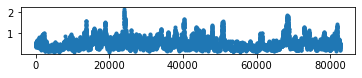

In [9]:
ax = plt.subplot(4,1,1)
plt.plot(R2a[:,0],'.')

In [10]:
#R2a[R2a<=.01]=np.nan
t = crests[0]-1.
print("threshold: ",t)
x = R2a[~np.isnan(R2a[:,0]),0]
pct=percentileofscore(x,t)
print("pct: ",pct)
stat_summary(x)

threshold:  0.50422101
pct:  53.28456474030724


{'n': 13670,
 'nnan': 0,
 'nvalid': 13670,
 'mean': 0.5385467353276876,
 'std': 0.24018616932952716,
 'min': 0.13093388293210756,
 'max': 2.177984974322216,
 'd5': 0.2605190817087014,
 'd25': 0.37587339317922625,
 'd50': 0.48866874570209595,
 'd75': 0.6362626370222361,
 'd95': 0.9928404687662431}

In [11]:
t = crests[1]-1.
print("threshold: ",t)
x = R2a[~np.isnan(R2a[:,1]),1]
pct=percentileofscore(x,t)
print("pct: ",pct)
stat_summary(x)

threshold:  0.77857358
pct:  80.51938551572788


{'n': 13670,
 'nnan': 0,
 'nvalid': 13670,
 'mean': 0.6041085665407939,
 'std': 0.2694260552304666,
 'min': 0.14687356758667744,
 'max': 2.443129434225608,
 'd5': 0.2922342643332635,
 'd25': 0.4216316279703434,
 'd50': 0.5481585090284804,
 'd75': 0.7137202481806731,
 'd95': 1.1137073034620042}

In [12]:
t = crests[2]-1.
print("threshold: ",t)
x = R2a[~np.isnan(R2a[:,2]),2]
pct=percentileofscore(x,t)
print("pct: ",pct)
stat_summary(x)

threshold:  1.0529261600000002
pct:  90.0512070226774


{'n': 13670,
 'nnan': 0,
 'nvalid': 13670,
 'mean': 0.6751275918681627,
 'std': 0.3010997922043214,
 'min': 0.16414002960043023,
 'max': 2.730343820475488,
 'd5': 0.32658933520910005,
 'd25': 0.4711986576800993,
 'd50': 0.6126000435344765,
 'd75': 0.7976252268378107,
 'd95': 1.244634775066569}

In [13]:
t = crests[3]-1.
print("threshold: ",t)
x = R2a[~np.isnan(R2a[:,3]),3]
pct=percentileofscore(x,t)
print("pct: ",pct)
stat_summary(x)

threshold:  1.3272787400000001
pct:  94.02340892465253


{'n': 13670,
 'nnan': 0,
 'nvalid': 13670,
 'mean': 0.7509096717725808,
 'std': 0.33489780133159086,
 'min': 0.18256450667486507,
 'max': 3.036820901344392,
 'd5': 0.36324850807487136,
 'd25': 0.5240900144506887,
 'd50': 0.6813634980395996,
 'd75': 0.8871574862241316,
 'd95': 1.3843431992400115}

In [14]:
big = R2a[R2a>2.2]
print(len(big)/13670)

0.006364301389904901


C:\Users\csherwood\AppData\Local\Continuum\miniconda3\envs\CRS\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
